In [784]:
import pandas as pd
import numpy as np
import seaborn as sns
import math

In [785]:
data = pd.read_csv('train.csv')

In [786]:
data.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [787]:
data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [788]:
data['Age'] = data['Age'].fillna(np.mean(data['Age']))

In [789]:
purchases = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for purchase in purchases:
    data[purchase] = data[purchase].fillna(np.around(np.mean(data[purchase]), 0))

In [790]:
data['Spending'] = data['RoomService'] + data['FoodCourt'] + data['ShoppingMall'] + data['Spa'] + data['VRDeck']

<AxesSubplot: xlabel='VIP', ylabel='Spending'>

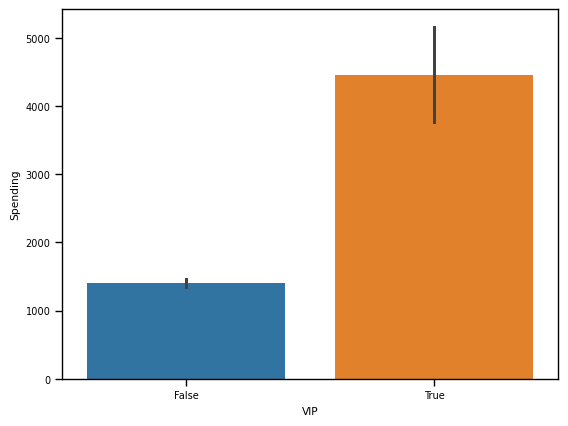

In [791]:
sns.barplot(x=data['VIP'],y=data['Spending'], data=data)

In [792]:
print(np.mean(data[data['VIP'] == False]['Spending']))
print(np.mean(data[data['VIP'] == True]['Spending']))

1403.3788445302134
4457.437185929648


In [793]:
data['VIP'] = data.apply(lambda row: False if row['Spending'] < 1500 else True, axis=1)

In [794]:
data['Cabin'] = data['Cabin'].fillna("U/-1/U")

In [795]:
data[['Group', 'GroupNum']] = data['PassengerId'].str.split('_', expand=True)

In [796]:
data[['Dock', 'Num', 'Side']] = data['Cabin'].str.split('/', expand=True)

In [797]:
data['Num'] = data['Num'].astype('int')

In [798]:
data[['Cabin', 'Group']].head(100)

,Cabin,Group
0,B/0/P,0001
1,F/0/S,0002
2,A/0/S,0003
3,A/0/S,0003
4,F/1/S,0004
...,...,...
95,F/24/S,0103
96,G/18/S,0103
97,G/18/S,0103
98,F/21/P,0105


In [799]:
def findPlanet(row, df, column, default):
    currplanet = row[column]
    
    if currplanet is np.nan:
        group_id = row['Group']
        temp = df[df['Group'] == group_id]

        planets = temp[column].unique()
        homeplanet = default

        for planet in planets:
            if planet is not np.nan:
                homeplanet = planet

        return homeplanet
    else:
        return currplanet
        

In [800]:
data['HomePlanet'] = data.apply(findPlanet, axis=1, args=[data,'HomePlanet','Earth'])
data['Destination'] = data.apply(findPlanet, axis=1, args=[data,'Destination', 'TRAPPIST-1e'])

In [801]:
data.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep       217
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
Spending          0
Group             0
GroupNum          0
Dock              0
Num               0
Side              0
dtype: int64

In [802]:
data['CryoSleep'] = data['CryoSleep'].fillna(False)

In [803]:
data = data.drop(['Name', 'PassengerId', 'Group', 'GroupNum', 'Cabin', 'Spending'], axis=1)

In [804]:
data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Dock,Num,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,True,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S


/var/folders/lg/wvxh7qj12gv3ql6vgm6gp6pw0000gn/T/ipykernel_93086/1640971632.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  datacorr = data.corr()


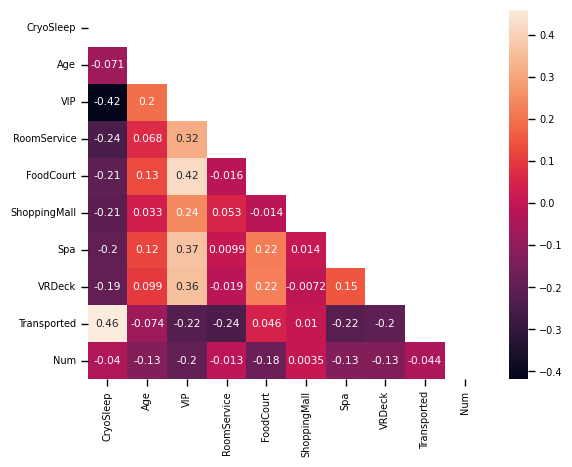

In [805]:
datacorr = data.corr()
mask = np.triu(datacorr)
sns.heatmap(datacorr, annot=True, mask=mask)
sns.set_context('paper', font_scale=0.8)

In [806]:
# One hot encoding
test = pd.get_dummies(data, columns=['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported'], drop_first=True)

In [807]:
from sklearn.preprocessing import LabelEncoder
dockle = LabelEncoder()
sidele = LabelEncoder()
egdock = dockle.fit_transform(data['Dock'])
egside = sidele.fit_transform(data['Side'])

test['Dock'] = pd.Series(egdock)
test['Side'] = pd.Series(egside)

In [808]:
test.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Dock,Num,Side,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True,Transported_True
0,39.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0,0,1,0,0
1,24.0,109.0,9.0,25.0,549.0,44.0,5,0,1,0,0,0,0,1,0,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0,0,1,1,0,0,0,1,1,0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0,0,1,1,0,0,0,1,1,0
4,16.0,303.0,70.0,151.0,565.0,2.0,5,1,1,0,0,0,0,1,0,1


In [809]:
X = test.drop('Transported_True', axis=1).values
y = test['Transported_True'].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=24)

In [810]:
# from sklearn.svm import SVC

# classifier = SVC(kernel='rbf')
# classifier.fit(X_train, y_train)
# y_pred = classifier.predict(X_test)

In [811]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=500)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [812]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [813]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(max_iter=500)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [814]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print(f"{classification_report(y_test, y_pred)}")
print(f"{accuracy_score(y_test, y_pred)}")
print(f"{confusion_matrix(y_test, y_pred)}")

              precision    recall  f1-score   support

           0       0.83      0.77      0.80      1096
           1       0.78      0.84      0.81      1078

    accuracy                           0.81      2174
   macro avg       0.81      0.81      0.81      2174
weighted avg       0.81      0.81      0.81      2174

0.8068077276908924
[[845 251]
 [169 909]]


In [815]:
test_data = pd.read_csv('test.csv')
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [816]:
test_data.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [817]:
test_data['Age'] = test_data['Age'].fillna(np.mean(test_data['Age']))

In [818]:
purchases = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for purchase in purchases:
    test_data[purchase] = test_data[purchase].fillna(np.around(np.mean(test_data[purchase]), 0))

In [819]:
test_data['Spending'] = test_data['RoomService'] + test_data['FoodCourt'] + test_data['ShoppingMall'] + test_data['Spa'] + test_data['VRDeck']

In [820]:
test_data['VIP'] = test_data.apply(lambda row: False if row['Spending'] < 1500 else True, axis=1)

In [821]:
test_data['Cabin'] = test_data['Cabin'].fillna("U/-1/U")

In [822]:
test_data[['Dock', 'Num', 'Side']] = test_data['Cabin'].str.split('/', expand=True)

In [823]:
test_data['Num'] = test_data['Num'].astype('int')

In [824]:
test_data['CryoSleep'] = test_data['CryoSleep'].fillna(False)

In [825]:
test_data[['Group', 'GroupNum']] = test_data['PassengerId'].str.split('_', expand=True)

In [826]:
test_data['HomePlanet'] = test_data.apply(findPlanet, axis=1, args=[test_data,'HomePlanet','Earth'])
test_data['Destination'] = test_data.apply(findPlanet, axis=1, args=[test_data,'Destination', 'TRAPPIST-1e'])

In [827]:
test_data = test_data.drop(['Name', 'Group', 'GroupNum', 'Cabin', 'Spending'], axis=1)

In [828]:
# One hot encoding
test_data_encoded = pd.get_dummies(test_data, columns=['HomePlanet', 'CryoSleep', 'Destination', 'VIP'], drop_first=True)

In [829]:
test_data_encoded['Dock'] = pd.Series(egdock)
test_data_encoded['Side'] = pd.Series(egside)

In [830]:
test_data_encoded.head()

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Dock,Num,Side,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,0013_01,27.0,0.0,0.0,0.0,0.0,0.0,1,3,0,0,0,1,0,1,0
1,0018_01,19.0,0.0,9.0,0.0,2823.0,0.0,5,4,1,0,0,0,0,1,1
2,0019_01,31.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1,0,1,0,0,0
3,0021_01,38.0,0.0,6652.0,0.0,181.0,585.0,0,1,1,1,0,0,0,1,1
4,0023_01,20.0,10.0,0.0,635.0,0.0,0.0,5,5,1,0,0,0,0,1,0


In [833]:
test_X = test_data_encoded.drop(['PassengerId'], axis=1).values

In [834]:
result = pd.DataFrame(columns=['PassengerId'])

In [835]:
result['PassengerId'] = test_data['PassengerId']
result.head()

,PassengerId
0,0013_01
1,0018_01
2,0019_01
3,0021_01
4,0023_01


In [836]:
test_X

array([[2.70000000e+01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.90000000e+01, 0.00000000e+00, 9.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [3.10000000e+01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.86581462e+01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.86581462e+01, 0.00000000e+00, 2.68000000e+03, ...,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [4.30000000e+01, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [839]:
res_pred = classifier.predict(test_X)

In [840]:
result['Transported'] = pd.Series(res_pred)

In [841]:
result.head()

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,1


In [842]:
result["Transported"] = result['Transported'].apply(lambda x: False if x==0 else True)

In [843]:
result.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [845]:
result.to_csv("submission.csv", index=False)